In [857]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [859]:
def activation(x):
        # Activation function (e.g., sigmoid, ReLU)]
    return 1 / (1 + np.exp(-x))  # Sigmoid function    
    

In [860]:
def derivative_activation(x):
    return x * (1 - x)  # Derivative of sigmoid function
    pass

# Feed forward

In [861]:
def feedforward(x, weights):
    """Return (output, list_of_activations)."""
    activations = []
    for W in weights:
        # add bias term to the current input
        x = np.concatenate([x, np.array([[1.0]])], axis=0)
        z = W @ x                # linear part
        a = activation(z)           # activation
        activations.append(a)
        x = a                     # next layer input
    return x, activations  

## Explanation



# Backpropagation

In [862]:
def backpropagation(x, y, weights, lr, l2):
    """Return gradients w.r.t. each weight matrix."""
    # ---- forward pass ----
    out, acts = feedforward(x, weights)

    # ---- backward pass ----
    grads = [None] * len(weights)

    # delta for output layer
    delta = (out - y) * derivative_activation(out)          # (4,1)

    # gradient for last weight matrix
    a_prev = np.concatenate([acts[-2], np.array([[1.0]])], axis=0)
    grads[-1] = delta @ a_prev.T                         # (4,4) if hidden has 3+1 bias

    # propagate through hidden layers (only one hidden layer here)
    for i in range(len(weights) - 2, -1, -1):
        W_next = weights[i + 1]
        # remove bias row from W_next when back‑propagating
        W_next_no_bias = W_next[:, :-1]                  # (4,3)
        delta = (W_next_no_bias.T @ delta) * derivative_activation(acts[i])

        a_prev = np.concatenate([x if i == 0 else acts[i-1],
                                 np.array([[1.0]])], axis=0)
        grads[i] = delta @ a_prev.T

    # ---- weight update (with L2 regularisation) ----
    for i, g in enumerate(grads):
        weights[i] -= lr * (g + l2 * weights[i])

    return out

## Explanation

In [863]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Training 

In [864]:
def train(weights,inputs,targets , lr, epochs, l2_reg):
    weight_history = []
    weight_history.append([w.copy() for w in weights])
    for epoch in range(1, epochs + 1):
        # train on the whole batch (auto‑encoder → one epoch = one batch)
        for i in range(inputs.shape[1]):
            x = inputs[:, i:i+1]      # (8,1)
            y = targets[:, i:i+1]     # (8,1)
            out = backpropagation(x, y, weights, lr, l2_reg)

        weight_history.append([w.copy() for w in weights])
        if epoch % 1000 == 0 or epoch == 1:
            # compute RMSE on the whole set
            preds = []
            for i in range(inputs.shape[1]):
                p, _ = feedforward(inputs[:, i:i+1], weights)
                preds.append(p.T)      # (1,8)
            preds = np.vstack(preds).T   # (8,8)
            print(f"Epoch {epoch:5d}  RMSE = {rmse(targets, preds):.4f}")
    
    return weight_history

## Explanation


In [865]:
layer_1 = np.random.rand(3, 9) 
print(np.shape(layer_1))# 8 inputs + 1 bias, 3 neurons
layer_2 = np.random.rand(8, 4)  # 3 inputs + 1 bias, 8 neurons
weights = [layer_1, layer_2]
print(np.shape(weights[0]))
inputs = np.array([
    [0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,1,0],
    [0,0,0,0,0,1,0,0],
    [0,0,0,0,1,0,0,0],
    [0,0,0,1,0,0,0,0],
    [0,0,1,0,0,0,0,0],
    [0,1,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0]
], dtype=float).T    

targets = inputs.copy()  

np.random.seed(0)
hidden_neurons = 3

# weight matrices include bias column as the last column
W1 = np.random.randn(hidden_neurons, inputs.shape[0] + 1)   # (3, 9)
W2 = np.random.randn(targets.shape[0], hidden_neurons + 1) 

weights = [W1, W2]
# print(weights)
weight_history = train(weights,inputs,targets,0.1,10000,0.0)
# print(weights)
# Example input with 7 zeros and 1 one
# print(layer_1)
# outp,activation = feedforward(input[0], weights)
# print(activation)
# backpropagation(input,input,weights,activation,0.01,0.01)
# print(activation)
# print(layer_2)

(3, 9)
(3, 9)
Epoch     1  RMSE = 0.4885
Epoch  1000  RMSE = 0.2027
Epoch  2000  RMSE = 0.1348
Epoch  3000  RMSE = 0.0991
Epoch  4000  RMSE = 0.0785
Epoch  5000  RMSE = 0.0661
Epoch  6000  RMSE = 0.0579
Epoch  7000  RMSE = 0.0521
Epoch  8000  RMSE = 0.0476
Epoch  9000  RMSE = 0.0441
Epoch 10000  RMSE = 0.0412


In [866]:

input = inputs[:, 1:1+1]

output,_ = feedforward(input, weights)
print(output)

[[4.80885481e-02]
 [7.08770183e-05]
 [1.22036146e-06]
 [1.47928432e-03]
 [4.77673724e-02]
 [5.66786105e-02]
 [9.27510939e-01]
 [1.12420715e-04]]


# Analysing the Weights

## Function for visualising the values of the weights 

In [867]:

def plot_weights(weights_history):
    for epoch, weights in enumerate(weights_history):
        for layer_index, layer_weights in enumerate(weights):
            plt.figure(figsize=(8, 3))
            plt.imshow(layer_weights.T, aspect='auto', cmap='viridis')
            plt.colorbar()
            plt.title(f'Epoch {epoch+1}, Layer {layer_index+1}')
            plt.xlabel('Input Features + Bias')
            plt.ylabel('Neurons')
            plt.show()
            

## Function for Showing the Network

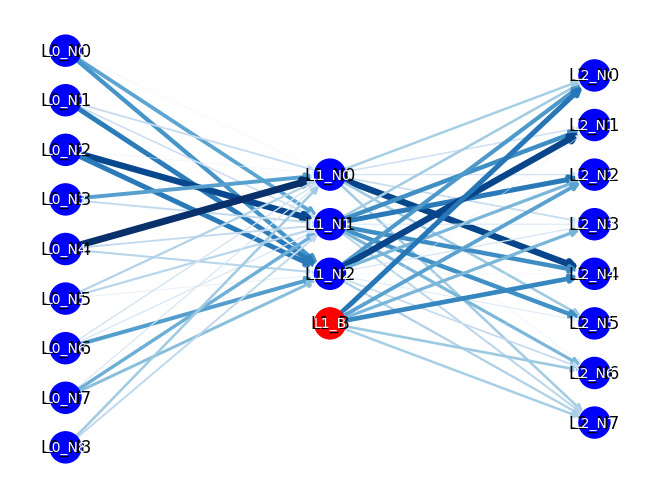

In [869]:
def plot_network(weights):
    try:
        G = nx.DiGraph()
        
        # Calculate layer sizes, accounting for bias nodes
        input_size = weights[0].shape[1]  # Input features (includes bias if present)
        hidden_size = weights[0].shape[0]  # Hidden neurons
        output_size = weights[1].shape[0]  # Output neurons
        hidden_with_bias = weights[1].shape[1]  # Hidden neurons + bias node
        
        layer_sizes = [input_size, hidden_size, output_size]
        
        # Add nodes for each layer with 'subset' attribute
        # Different colors for regular and bias nodes
        for layer, size in enumerate(layer_sizes):
            for i in range(size):
                node_type = 'regular'
                G.add_node(f'L{layer}_N{i}', subset=layer, node_type=node_type)
        
        # Add bias node to hidden layer
        if hidden_with_bias > hidden_size:
            G.add_node(f'L1_B', subset=1, node_type='bias')  # Bias for hidden layer
        
        # Add edges with weights
        # Layer 0 to Layer 1 (input to hidden)
        for i in range(input_size):
            for j in range(hidden_size):
                G.add_edge(f'L0_N{i}', f'L1_N{j}', weight=weights[0][j, i])
        
        # Layer 1 to Layer 2 (hidden to output)
        # First connect regular hidden nodes
        for i in range(hidden_size):
            for j in range(output_size):
                G.add_edge(f'L1_N{i}', f'L2_N{j}', weight=weights[1][j, i])
        
        # Then connect bias node if it exists
        if hidden_with_bias > hidden_size:
            bias_index = hidden_size  # Last column in weight matrix is for bias
            for j in range(output_size):
                G.add_edge(f'L1_B', f'L2_N{j}', weight=weights[1][j, bias_index])

        # Draw the graph
        pos = nx.multipartite_layout(G, subset_key="subset")
        
        # Customize node appearance based on node type
        node_colors = []
        for node, attrs in G.nodes(data=True):
            if 'node_type' in attrs and attrs['node_type'] == 'bias':
                node_colors.append('red')
            else:
                node_colors.append('blue')
        
        # Edge widths based on weights
        max_weight = max((abs(d['weight']) for _, _, d in G.edges(data=True)), default=1)
        edges = G.edges(data=True)
        edge_widths = [(abs(d['weight']) / max_weight * 5) for _, _, d in edges]

        # Draw nodes and edges
        nx.draw(G, pos, with_labels=True, node_size=500, node_color=node_colors,
                edgelist=edges, width=edge_widths,
                edge_color=edge_widths, edge_cmap=plt.cm.Blues)
        nx.draw_networkx_labels(G, pos, font_size=10, font_color='white')

        plt.show()

    except Exception as e:
        print(f"Error encountered: {e}")

# Example usage with bias nodes:
# layer_1 = np.random.rand(3, 9)  # Hidden × Input (3 hidden neurons, 9 input features)
# layer_2 = np.random.rand(8, 4)  # Output × Hidden (8 output neurons, 3 hidden + 1 bias)
weights = weight_history[500]
plot_network(weights)

# Visualising the weights for training epochs 0, 500, 1000, 1500, 2000

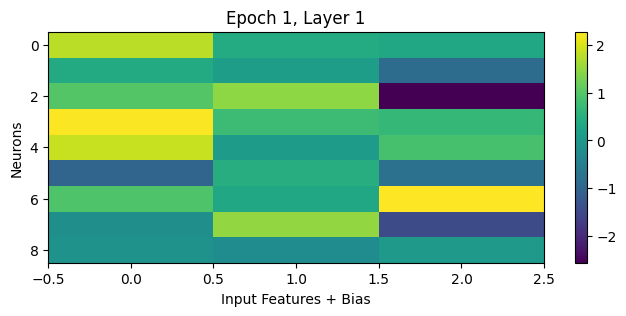

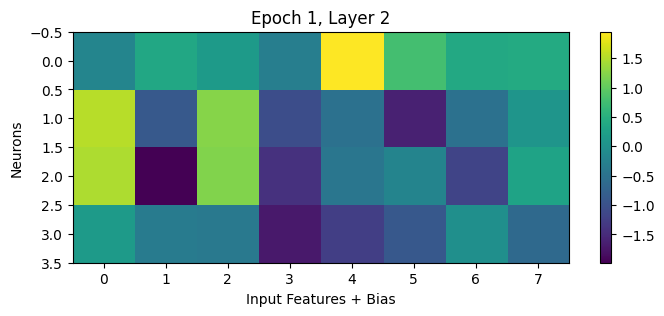

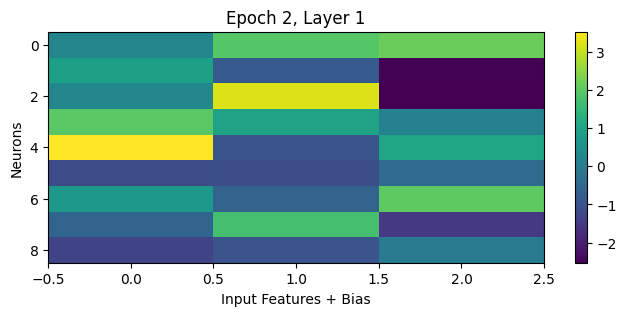

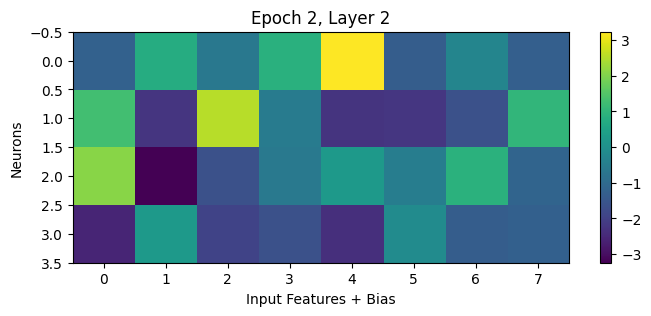

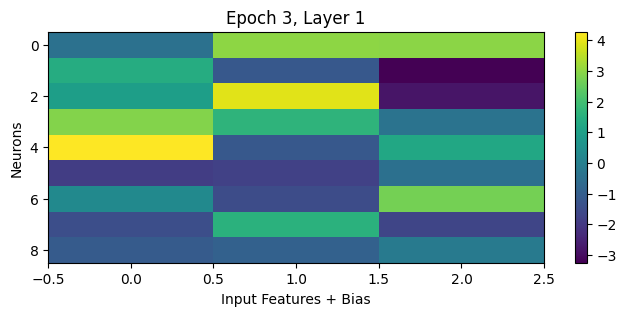

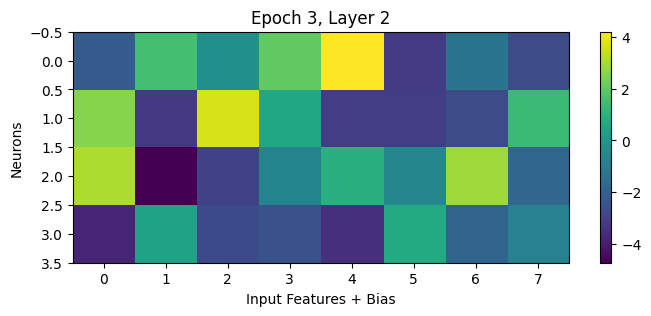

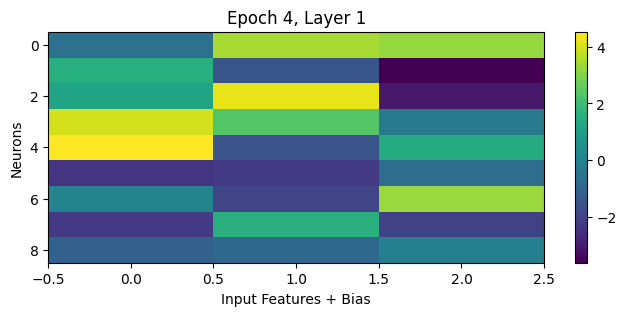

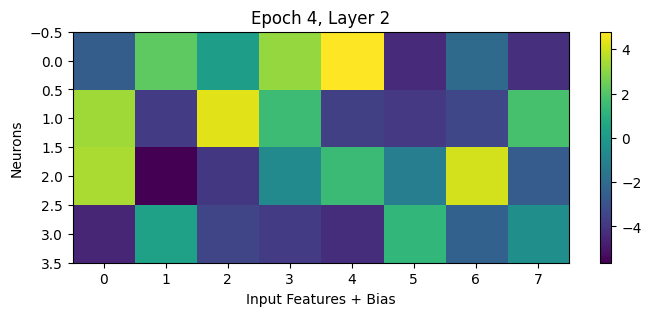

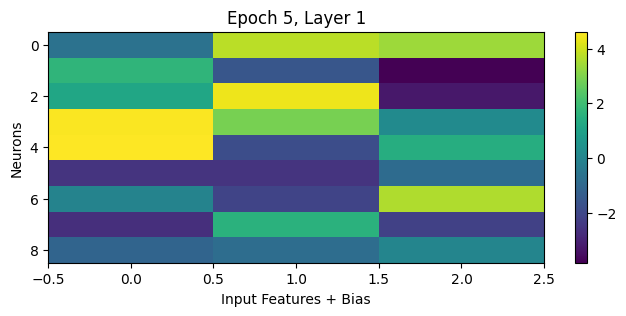

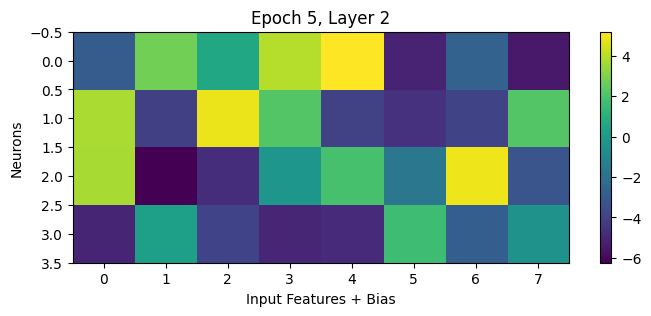

In [870]:
visual_weights = [weight_history[0],weight_history[500],weight_history[1000],weight_history[1500],weight_history[2000]]
plot_weights(visual_weights)

## Interpretation of results 

# Visualsing the network for epoch 0, 500, 1000, 1500, 2000

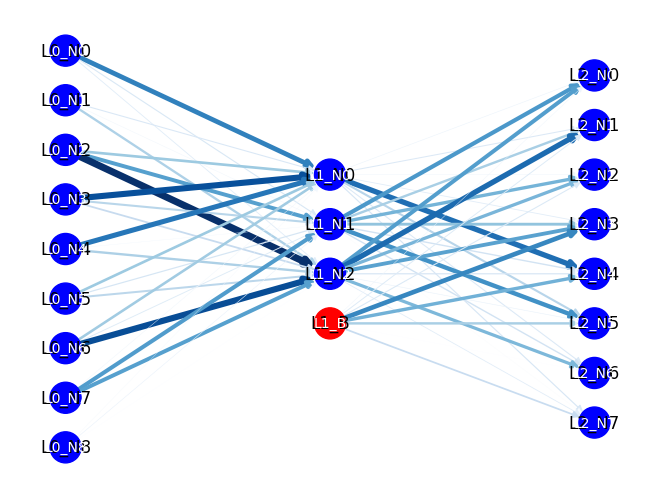

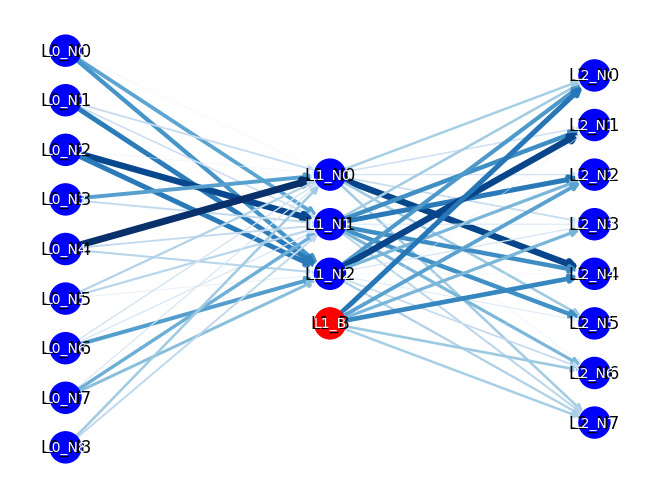

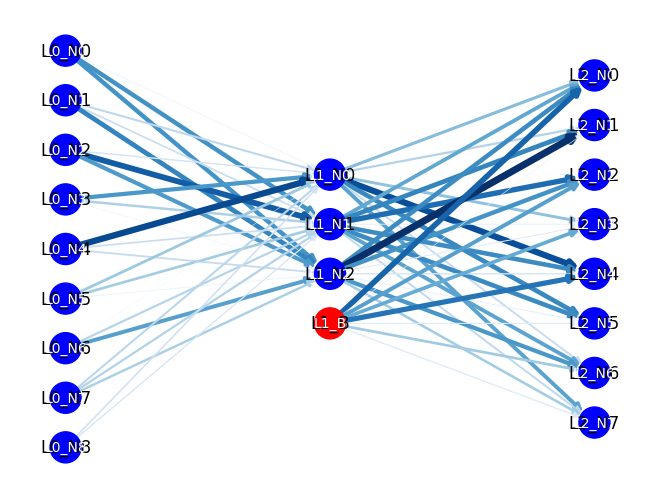

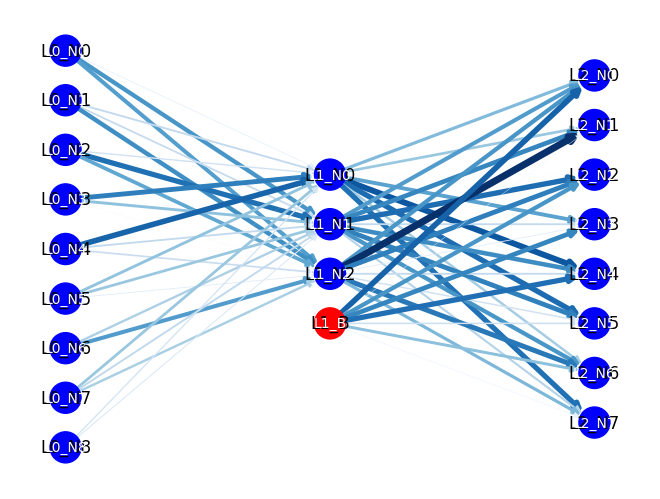

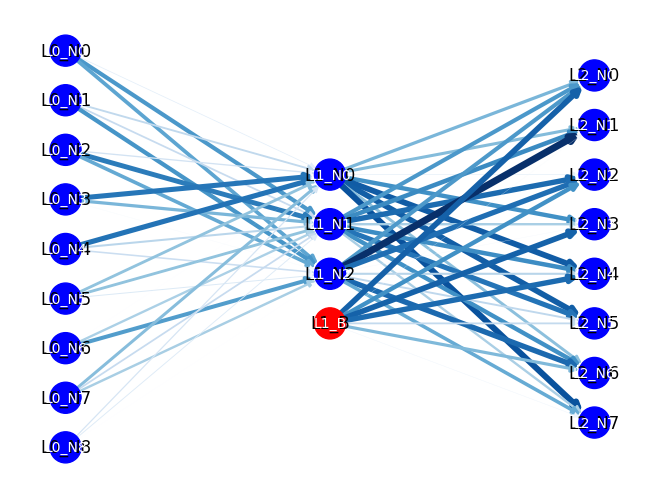

In [871]:
for i in visual_weights:
    plot_network(i)

## Interpretation of results 